Load the `ISLR2` and `tidyverse` packages.

In [4]:
library(ISLR2)
library(tidymodels)

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.9     ✔ recipes      1.3.1
✔ dials        1.4.1     ✔ rsample      1.3.1
✔ dplyr        1.1.4     ✔ tibble       3.3.0
✔ ggplot2      3.5.2     ✔ tidyr        1.3.1
✔ infer        1.0.9     ✔ tune         1.3.0
✔ modeldata    1.5.0     ✔ workflows    1.2.0
✔ parsnip      1.3.2     ✔ workflowsets 1.1.1
✔ purrr        1.1.0     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()



`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [5]:
glimpse(Auto)

Rows: 392
Columns: 9
$ mpg          <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 2…
$ cylinders    <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, …
$ displacement <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 34…
$ horsepower   <int> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 16…
$ weight       <int> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 385…
$ acceleration <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, …
$ year         <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7…
$ origin       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, …
$ name         <fct> chevrolet chevelle malibu, buick skylark 320, plymouth sa…


Plot `mpg`  as a function of `displacement`.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


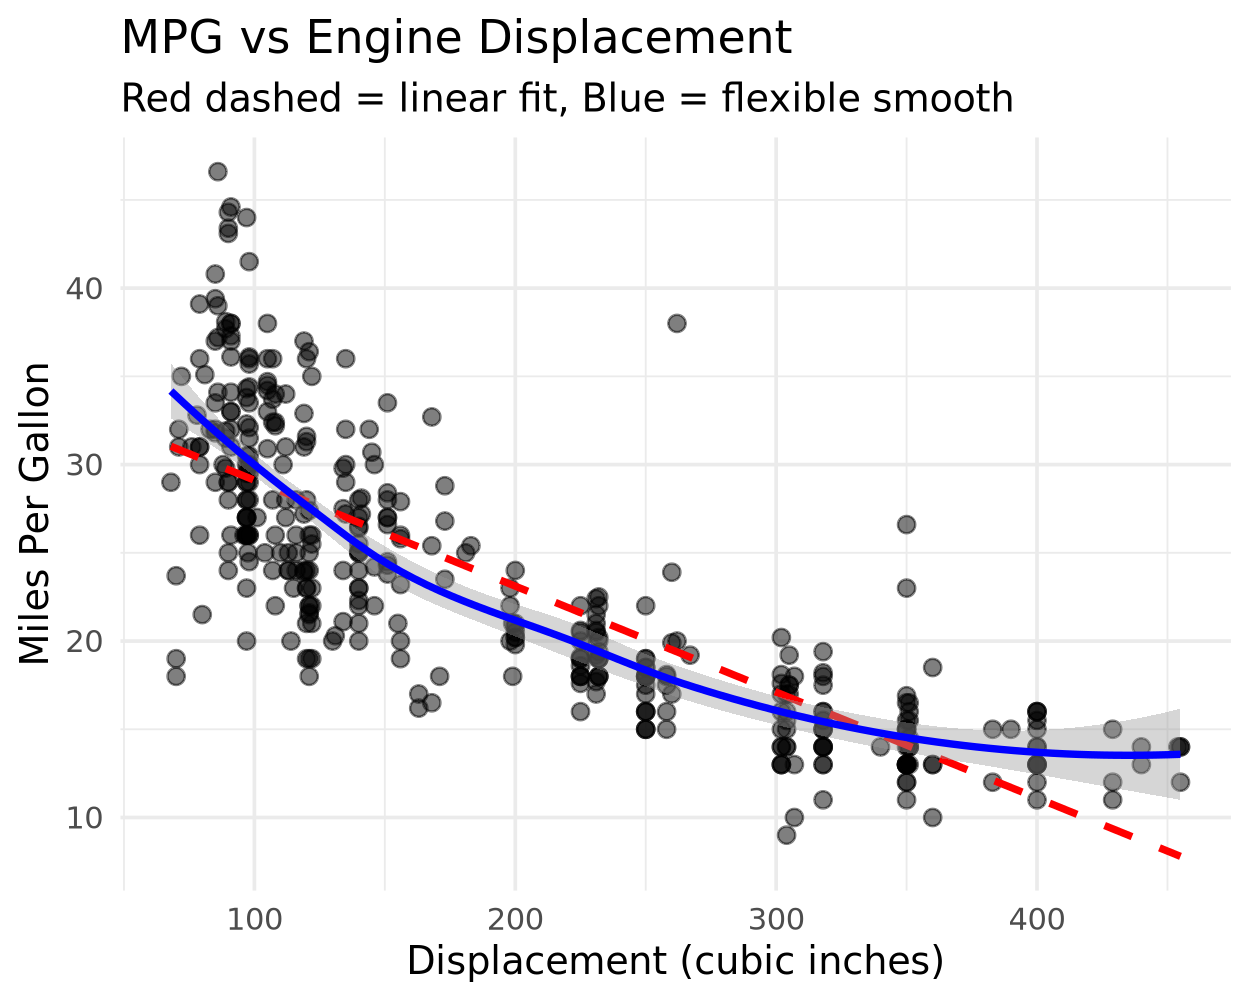

In [7]:
ggplot(Auto, aes(x = displacement, y = mpg)) +
    geom_point(alpha = 0.5, size = 2) +
    geom_smooth(method = 'lm', se = FALSE, color = 'red', linetype = 'dashed') +
    geom_smooth(method = 'loess', se = TRUE, color = 'blue') + 
    labs(title = "MPG vs Engine Displacement",
        subtitle = "Red dashed = linear fit, Blue = flexible smooth",
        x = "Displacement (cubic inches)",
        y = "Miles Per Gallon") +
    theme_minimal()

❓Does the relationship of `mpg` to `displacement` look linear?

**Answer:** No, the relationship does not appear to be linear. The plot shows a curved pattern where MPG drecreases rapidly for smaller displacement values, then the rate of decrease slows for large displacement values. The blue LOESS curve fits the data much better than the straight red line, indicating a non-linear relationship. This suggests we should use splines or polynomials to model this relationship.

Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

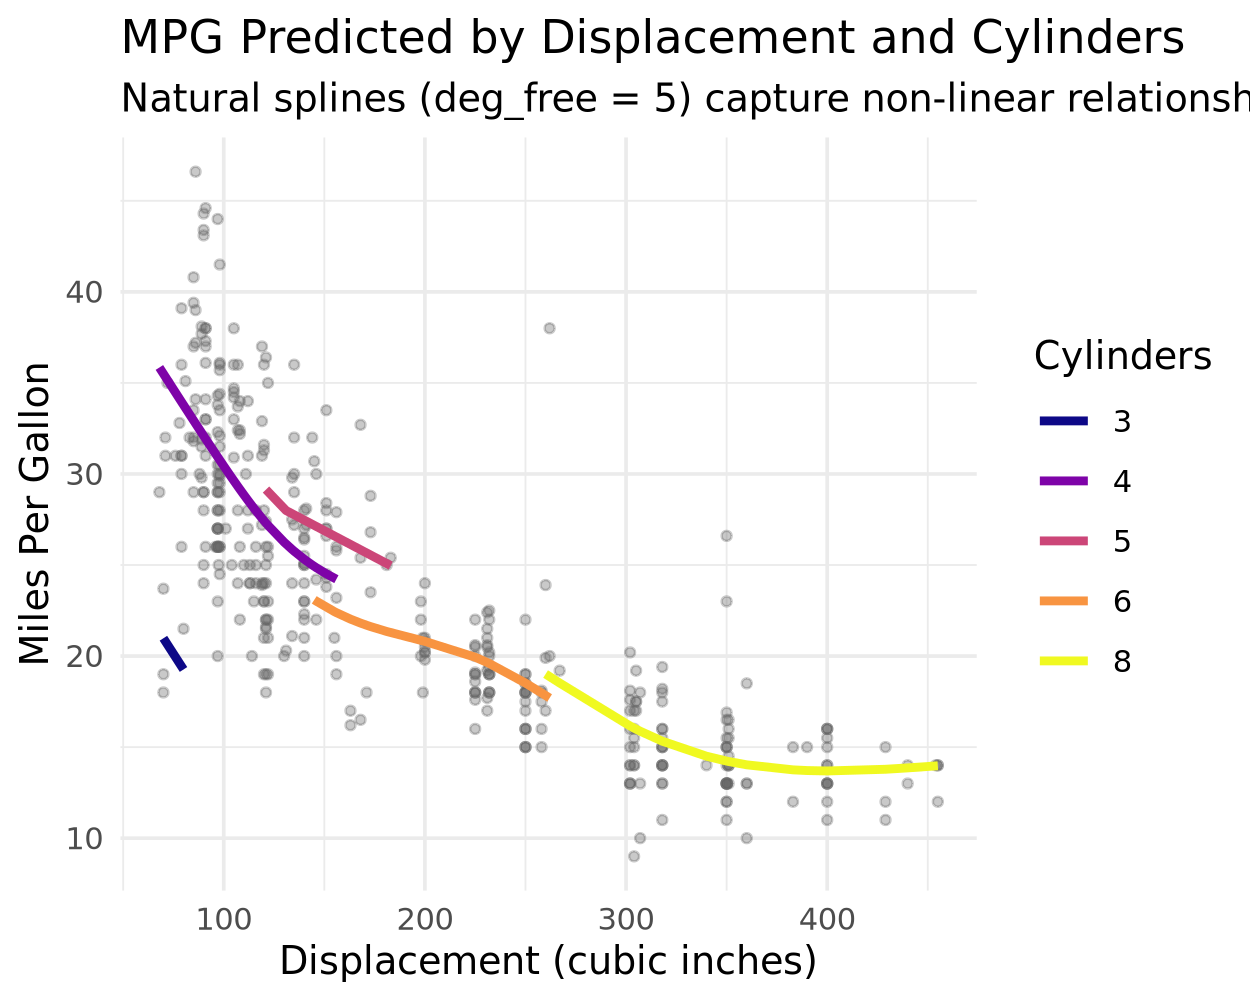

In [12]:
rec = recipe(mpg ~ displacement + cylinders, data = Auto) |>
  step_ns(displacement, deg_free = 5) |>
  step_mutate(cyl_cat = factor(cylinders)) |>
  step_dummy(cyl_cat) |>
  step_rm(cylinders)

mod_spec = linear_reg() |>
  set_engine("lm")

wf = workflow() |>
  add_recipe(rec) |>     
  add_model(mod_spec)

mod_fit = wf |> fit(data = Auto)

predict(mod_fit, new_data = Auto) |>
  bind_cols(Auto) |>
  ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35, color = "gray40") +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1.2) +
    scale_color_viridis_d(option = "plasma") +
    labs(title = "MPG Predicted by Displacement and Cylinders",
         subtitle = "Natural splines (deg_free = 5) capture non-linear relationship",
         x = "Displacement (cubic inches)",
         y = "Miles Per Gallon",
         color = "Cylinders") +
    theme_minimal()